# REACHING_TASK --> Use this kernal

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')


### Make sure you use version 2.2.0 of pynwb
- pip uninstall pynwb
- pip install pynwb==2.2.0

In [2]:
import pynwb
print(pynwb.__version__)

2.3.3


## Summary of code
- you will need to change alot to make this work for you
- mainly the variable names for the different iput to the digital lines, and the paths to your data
- right now it is set up to work with the data from the reaching task from Jason Christie's lab, but it can be easily modified to work with other data

# Paths needed to be changed to your own paths

In [3]:
probe_names = ['A', 'B', 'C', 'D', 'E']
NP_type=['NP1','NP1','NP2','NP1','NP1']
probedepths = [4156, 7013, 1450, 4878, 6202]

In [4]:
file_name = 'reach7_07_2024-12-04_20-57-49_008'
root_recording_folder = fr"G:\Grant\neuropixels\kilosort_recordings\{file_name}"

In [5]:

recording_folder = root_recording_folder + r"\Record Node 103\experiment1\recording1\continuous"
if not os.path.exists(recording_folder):
    raise FileNotFoundError(f"Recording folder not found: {recording_folder}")
else:
    print("Recording folder found: ", recording_folder)

Recording folder found:  G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\Record Node 103\experiment1\recording1\continuous


#### Create a file name for the NWB file
- if an NWB already exists for this session, a new NWB file will be created with a timestamp added to the file name, so you dont over write the old file"

In [6]:
# THIS SHOULD NOT just point to the folder, but needs to include the name you want the nwb file to be called /nwb_file_name
nwb_save_path = fr"G:\Grant\neuropixels\nwb\{file_name}"

if not os.path.exists(nwb_save_path):
    print("Now NWB file found with this name, creating it now: ", nwb_save_path)
else:
    print("NWB save file already exists, saving you from overwriting your data by adding a timestamp to the end of the file name")
    nwb_save_path = nwb_save_path +'__' + dt.datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")

print("NWB file will be saved as: ", nwb_save_path)

Now NWB file found with this name, creating it now:  G:\Grant\neuropixels\nwb\reach7_07_2024-12-04_20-57-49_008
NWB file will be saved as:  G:\Grant\neuropixels\nwb\reach7_07_2024-12-04_20-57-49_008


In [7]:
from open_ephys.analysis import Session

directory = recording_folder # for example
directory = root_recording_folder # for example


session = Session(directory)
print(f'session: {session}')


session: 
Open Ephys Recording Session Object
Directory: G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008

<object>.recordnodes:
  Index 0: Record Node 103 (binary format)



In [8]:
session.recordnodes[0].recordings[0].events
session.recordnodes[0].recordings[0].events

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,1,610364,244.002726,100,3,ProbeB-LFP,0
1,1,610369,244.002729,100,1,ProbeA-LFP,0
2,1,7324428,244.002733,100,0,ProbeA-AP,0
3,1,610362,244.002735,100,6,ProbeD-LFP,0
4,1,7324369,244.002736,100,2,ProbeB-AP,0
...,...,...,...,...,...,...,...
833192,1,13294262,5317.560000,100,1,ProbeA-LFP,1
833193,1,13294028,5317.560039,100,8,ProbeE-LFP,1
833194,1,159528341,5317.560075,100,7,ProbeE-AP,1
833195,1,159529481,5317.560237,100,5,ProbeD-AP,1


In [9]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)


# Speical global_timestamps df 
- this is used ONLY if your timestamps get messed up due to a syncronization issue during the recording, otherwise do not run the cell bellow
#### Here are the steps to make a global_timestamps df if our data is messed up
- use the manually_align_timestamps.ipynb file 

In [10]:
# global_timestamps_df = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\Record Node 103\experiment1\recording1\events\global_timestamps\global_timestamps_overwrite.csv"
# events_df = pd.read_csv(global_timestamps_df)
# events_df

### Verify all event types are being recorded

In [11]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeA_AP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
2,1,7324428,244.002733,100,0,ProbeA-AP,0
13,1,7339428,244.502733,100,0,ProbeA-AP,1
28,1,7354429,245.002767,100,0,ProbeA-AP,0
34,1,7369429,245.502767,100,0,ProbeA-AP,1
45,1,7384429,246.002767,100,0,ProbeA-AP,0
...,...,...,...,...,...,...,...
833147,1,159471146,5315.559654,100,0,ProbeA-AP,1
833165,1,159486147,5316.060033,100,0,ProbeA-AP,0
833167,1,159501147,5316.559687,100,0,ProbeA-AP,1
833184,1,159516147,5317.060033,100,0,ProbeA-AP,0


In [12]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeB_AP = events_df[events_df.stream_name == 'ProbeB-AP' ]
probeC_AP = events_df[events_df.stream_name == 'ProbeC' ]
probeD_AP = events_df[events_df.stream_name == 'ProbeD-AP' ]
probeE_AP = events_df[events_df.stream_name == 'ProbeE-AP' ]


In [13]:
ni_df = events_df[events_df.stream_name == 'PXIe-6341' ]
ni_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
12,7,9796405,244.502731,102,9,PXIe-6341,1
27,7,9816405,245.002746,102,9,PXIe-6341,0
38,7,9836405,245.502785,102,9,PXIe-6341,1
39,7,9856404,246.002751,102,9,PXIe-6341,0
52,7,9876404,246.502766,102,9,PXIe-6341,1
...,...,...,...,...,...,...,...
833151,7,212632632,5315.559944,102,9,PXIe-6341,1
833160,7,212652631,5316.059934,102,9,PXIe-6341,0
833171,7,212672631,5316.559949,102,9,PXIe-6341,1
833180,7,212692630,5317.059939,102,9,PXIe-6341,0


In [14]:
Digital_line_8 = ni_df[ni_df['line'] == 8]
Digital_line_7 = ni_df[ni_df['line'] == 7]
Digital_line_6 = ni_df[ni_df['line'] == 6]
Digital_line_5 = ni_df[ni_df['line'] == 5]
Digital_line_4 = ni_df[ni_df['line'] == 4]
Digital_line_3 = ni_df[ni_df['line'] == 3]

# Change thse varaible names to match the ones you have in your events_df
- for open-ephys each digital line collects specific events, so you need to know what each line is collecting
- you then need to create a dictionary that maps the digital line to the event name

In [15]:
## Change these names
frame_events = Digital_line_8.sort_values(by="timestamp", ascending=True)
sync_pulse_events = Digital_line_7.sort_values(by="timestamp", ascending=True)
tone1_events = Digital_line_6.sort_values(by="timestamp", ascending=True)
tone2_events = Digital_line_5.sort_values(by="timestamp", ascending=True)
stimROI_events = Digital_line_4.sort_values(by="timestamp", ascending=True)
optical_events = Digital_line_3.sort_values(by="timestamp", ascending=True)


In [16]:
probeA_AP = probeA_AP.sort_values(by="timestamp", ascending=True)
probeB_AP = probeB_AP.sort_values(by="timestamp", ascending=True)
probeC_AP = probeC_AP.sort_values(by="timestamp", ascending=True)
probeD_AP = probeD_AP.sort_values(by="timestamp", ascending=True)
probeE_AP = probeE_AP.sort_values(by="timestamp", ascending=True)

In [17]:
probeA_AP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
2,1,7324428,244.002733,100,0,ProbeA-AP,0
13,1,7339428,244.502733,100,0,ProbeA-AP,1
28,1,7354429,245.002767,100,0,ProbeA-AP,0
34,1,7369429,245.502767,100,0,ProbeA-AP,1
45,1,7384429,246.002767,100,0,ProbeA-AP,0
...,...,...,...,...,...,...,...
833147,1,159471146,5315.559654,100,0,ProbeA-AP,1
833165,1,159486147,5316.060033,100,0,ProbeA-AP,0
833167,1,159501147,5316.559687,100,0,ProbeA-AP,1
833184,1,159516147,5317.060033,100,0,ProbeA-AP,0


In [18]:
# Digital Line 8
frame_timestamps = frame_events['timestamp'].values

# Digital Line 7
sync_pulse_timestamps = sync_pulse_events['timestamp'].values
sync_pulse_timestamps = sync_pulse_timestamps[0::2]

# Digital Line 6
stimROI_timestamps  = stimROI_events['timestamp'].values
stimROI_timestamps = stimROI_timestamps[0::2]

# Digital Line 5
tone1_timestamps = tone1_events['timestamp'].values
tone1_timestamps = tone1_timestamps[0::2]

# Digital Line 4
optical_timestamps = optical_events['timestamp'].values

# Digital Line 4 --> (every 10th value)
first_optical_timestamp_per_event = optical_events['timestamp'].values
first_optical_timestamp_per_event = first_optical_timestamp_per_event[1::10]

# Digital Line 3 (NEED TO SET THIS UP FROM BUTTON)
tone2_timestamps  = tone2_events['timestamp'].values
tone2_timestamps = tone2_timestamps[0::2]


### Check that the timestamps are correct
- first part, check the total number of timestamps make sense
- Second part, check that the logic of the time stamps makes sense

In [19]:
print('Part 1: ')
print('frame timestamps:', len(frame_events))
print('sync_pulse timestamps:', len(sync_pulse_timestamps)) # 1hz
print('tone1 timestamps:', len(tone1_timestamps))
print('tone2 timestamps:', len(tone2_timestamps))
print('stimROI timestamps:', len(stimROI_timestamps))
print('optical timestamps:', len(optical_timestamps))
print('')
print('Part 2: ')
print('behavior video duration (min) using frames: ', round((len(frame_timestamps) / 150 / 60), 2))
print('open-ephys recording duration (min) using sync pulses: ', round((len(sync_pulse_timestamps) / 60), 2))
print('frame rate of camera (Value should be close to 150): ', round(len(frame_timestamps) / len(sync_pulse_timestamps), 2))
print('Avg time between frames (Goal is 0.40): ', round(np.mean(np.diff(frame_timestamps)) * 100, 2))
print('Avg time between sync pulses (Goal is 1.0): ', round(np.mean(np.diff(sync_pulse_timestamps)), 2))
print('Avg time between stimROI (should be roughly 15-20 seconds apart): ', round(np.mean(np.diff(stimROI_timestamps)), 2))
print('Avg time between first optical pulses (should be roughly identical to the value above for Avg time between stimROI): ', round(np.mean(np.diff(first_optical_timestamp_per_event)), 2))





Part 1: 
frame timestamps: 727088
sync_pulse timestamps: 5074
tone1 timestamps: 200
tone2 timestamps: 219
stimROI timestamps: 1680
optical timestamps: 432

Part 2: 
behavior video duration (min) using frames:  80.79
open-ephys recording duration (min) using sync pulses:  84.57
frame rate of camera (Value should be close to 150):  143.3
Avg time between frames (Goal is 0.40):  0.67
Avg time between sync pulses (Goal is 1.0):  1.0
Avg time between stimROI (should be roughly 15-20 seconds apart):  2.64
Avg time between first optical pulses (should be roughly identical to the value above for Avg time between stimROI):  111.58


#### Verify the duration of the recording, and the number of frames in the recording
- this should be the duration of the behavior video, not the full open-ephys recording duration. 
- because the open-ephys recording has baseline, opto-tagging, and other things making it longer

In [20]:
## Value should be 150, as the frame rate is 150 Hz, and the video was roughly 120 scoonds long
duration_of_video = 80 # in minutes

Behavior_video_length = duration_of_video * 60 # in seconds
print('value should be close to (150) because 150hz frame rate: ',len(frame_timestamps) / Behavior_video_length)

## Value is the duration of the behavior recording in minutes, because the frame rate is 150 Hz
print(len(frame_timestamps)/Behavior_video_length/60)


value should be close to (150) because 150hz frame rate:  151.47666666666666
2.524611111111111


#### Verify the time between the StimROI and the frame in which you saw light on the camera
- the Difference between Stim TTL & the first frame with an optical pusle seen should be less that 1.0ms

In [21]:
# light_seen_frame = [940,3985,6181,8418,11143,15432]
# stim_number = 0

# for i in light_seen_frame:

#     first_light_frame_vs_StimTTL_difference = (stimROI_timestamps[stim_number] -  frame_timestamps[i]) *100

#     print('stim number:', stim_number+1)
#     print(f'stimROI TTL timestamps Vs. timestamp of frame with first optical pulse: ', stimROI_timestamps[stim_number].round(2),frame_timestamps[i].round(2))
#     print(f'Difference between Stim TTL & the first frame with an optical pusle seen: ', first_light_frame_vs_StimTTL_difference.round(2))
#     print('')
    
#     stim_number += 1
    

### if you want to plot your events you can here
- you just need to change all the variable names to match your data

In [22]:
tone1_timestamps[0],tone2_timestamps[0], stimROI_timestamps[0], optical_timestamps[0]

(247.71032728126445, 265.0572456559737, 884.3483381777169, 265.8942706686352)

## Plot events to see if they are aligned

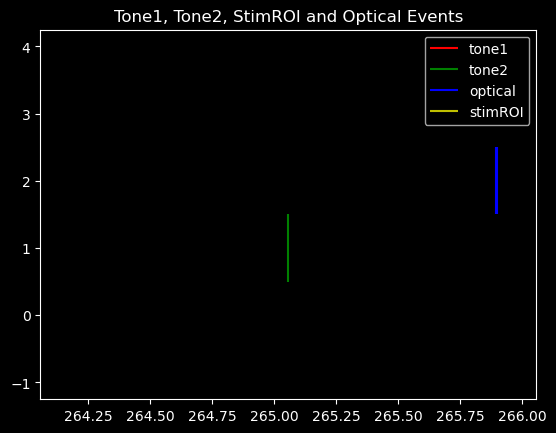

In [23]:
# Check one single event / reach
plt.eventplot([tone1_timestamps,tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r','g','b','y'])
plt.xlim(tone2_timestamps[0]-1, tone2_timestamps[0]+1)
plt.legend(['tone1','tone2', 'optical','stimROI'])
plt.title('Tone1, Tone2, StimROI and Optical Events')
plt.show()


## Create a plot for every reach
- this saves the plots showing the timeing of the events as recorded by the digital board 
- plots are saved too the reach_event_save_path and full_reach_event_save_path (both paths are automatically created at the start of this 01_makeNWB.ipynb file, and should be in the root recording foler)

In [24]:
import pandas as pd
df = pd.DataFrame(T6000_frame)
# df.to_csv (T6000_frame_path, index = None, header=True)

NameError: name 'T6000_frame' is not defined

In [43]:
reach_event_save_path_03 = reach_event_save_path + '\\3_combined_reach_events'

if reach_event_save_path_03+f'\\reach_1.png' in glob.glob(reach_event_save_path_03+f'\\reach_*.png'):
    print('Files / plots already exist')
    print('either delete the plots or change the save path')

else:
    if not os.path.exists(reach_event_save_path_03):
        os.makedirs(reach_event_save_path_03)
        print('Directory created: ', reach_event_save_path_03)
    fig, axs = plt.subplots(nrows=3,ncols=1, figsize=(6,10))

    for i in range(len(tone1_timestamps)):
        
        axs[0].eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
        axs[0].set_xlim(tone1_timestamps[i]-3.5, tone1_timestamps[i]+3.5)
        axs[0].legend(['tone1','tone2', 'optical','stimROI'])
        axs[0].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        axs[1].eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
        axs[1].set_xlim(tone1_timestamps[i]-12.5, tone1_timestamps[i]+12.5)
        axs[1].legend(['tone1','tone2', 'optical','stimROI'])
        axs[1].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        axs[2].eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
        axs[2].set_xlim(tone1_timestamps[i]-20, tone1_timestamps[i]+20)
        axs[2].legend(['tone1','tone2', 'optical','stimROI'])
        axs[2].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        plt.tight_layout()

        plt.savefig(reach_event_save_path_03+f'\\reach_{i}.png')

Files / plots already exist
either delete the plots or change the save path


In [44]:
# if reach_event_save_path+f'\\reach_1.png' in glob.glob(reach_event_save_path+f'\\reach_*.png'):
#     print('Files already exists')
# else:
#     for i in range(len(tone1_timestamps)):
#         plt.eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
#         #plt.xlim(tone1_timestamps[i]-2, tone2_timestamps[i]+2)
#         plt.xlim(tone1_timestamps[i]-2, tone1_timestamps[i]+3)
#         plt.legend(['tone1','tone2', 'optical','stimROI'])
#         plt.title('Tone2 and Optical Events')
#         plt.savefig(reach_event_save_path+f'\\reach_{i}.png')

        
#     for i in range(len(tone1_timestamps)):
#         plt.eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
#         plt.xlim(tone1_timestamps[i]-10, tone2_timestamps[i]+10)
#         plt.legend(['tone1','tone2', 'optical','stimROI'])
#         plt.title('Tone2 and Optical Events')
#         plt.savefig(full_reach_event_save_path+f'\\reach_{i}.png')



## End of plotting 

### using the number of rows recorded in the frame_events dataframe, we can calculate the total number of frames recorded, since each row is equivalent to one frame. we can use this to find total recording duration in seconds

In [25]:
row_numbers = np.arange(1, len(ni_df[ni_df['line'] == 8]) + 1)
open_ephys_frames = row_numbers
frames_in_seconds_open_ephys = np.array(row_numbers) / 150
frames_in_seconds_open_ephys[0:5]


array([0.00666667, 0.01333333, 0.02      , 0.02666667, 0.03333333])

### Plot the digital line inputs

In [26]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

## plot of digital events. Line 8 is the camera frame trigger, line 5 is the tone1 and tone2, line 6 is just tone2, line 4 is the optical pulses

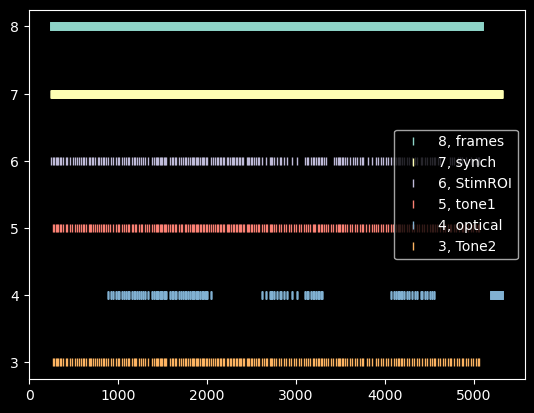

In [27]:
ch_name = ['8, frames', '7, synch', '6, StimROI','5, tone1', '4, optical', '3, Tone2']
i=0
for ch in ([8,7,6,5,4,3]):
    # plt.xlim(65,75)
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch_name[i])

    i+=1
plt.legend()


### Create a dictionary to store the data (this is the simple option)
- you again need to update this to match all of your data

In [28]:
stimuli_times_simple = { 'tone1_timestamps': tone1_timestamps,
                'tone2_timestamps': tone2_timestamps,
                'stimROI_timestamps': stimROI_timestamps,
                'frame_events_timestamp': frame_timestamps,
                'frames_in_seconds_openEphys':frames_in_seconds_open_ephys,
                'optical_timestamps': optical_timestamps,

                  }

In [29]:

#stimulus list
stimuli = {'none': None,
           } 

## Assemble NWB

In [30]:
# !pip install pynwb
# !pip install numpy==1.24.3


In [31]:
recording_folder = root_recording_folder
# recording_folder = r'G:/Grant/rotation/2023-09-29_16-07-39_PaBont2'

experimenter = 'grh'
experiment_description= 'Christie Lab, University of Colorado Anschutz. Reaching  task with Pontine Gray mossy fiber stimulation to induce learning. Mouse used Reach7, was a Niave Mouse that could reach with ~80% success rate. recorded with 5 neuropixels (four NP1, and one NP2-4-shank in MoP ) from (SIM&IP, PG, MoP, VaL, SnR) with (probe_A, Probe_B, and Probe_C, Probe_D and Probe_E) respectively'

# #spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A', 'B','C','D','E'] 

# Use MPM-relative probe depths (in microns)
probedepths = [4156,7013,1450,4878,6202] 

In [32]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [33]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

print(experiment_description)

nwbfile = NWBFile(experiment_description, 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Christie Lab',
                  institution='University of Colorado Anschtuz Medical Campus',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

Christie Lab, University of Colorado Anschutz. Reaching  task with Pontine Gray mossy fiber stimulation to induce learning. Mouse used Reach7, was a Niave Mouse that could reach with ~80% success rate. recorded with 5 neuropixels (four NP1, and one NP2-4-shank in MoP ) from (SIM&IP, PG, MoP, VaL, SnR) with (probe_A, Probe_B, and Probe_C, Probe_D and Probe_E) respectively


### add stimulus information
- choose to run either the stimuli_times or stimuli_times_simple cell bellow (you can only run one, and that will decidce whats in your nwb)

In [34]:
# for stim in stimuli_times.keys():
#     nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
#                       np.array(stimuli_times[stim])[-1]+3.,
#                       [stim])

In [35]:
nwbfile

root pynwb.file.NWBFile at 0x2163261481024
Fields:
  experiment_description: Christie Lab, University of Colorado Anschutz. Reaching  task with Pontine Gray mossy fiber stimulation to induce learning. Mouse used Reach7, was a Niave Mouse that could reach with ~80% success rate. recorded with 5 neuropixels (four NP1, and one NP2-4-shank in MoP ) from (SIM&IP, PG, MoP, VaL, SnR) with (probe_A, Probe_B, and Probe_C, Probe_D and Probe_E) respectively
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2025, 4, 11, 18, 23, 26, 181191, tzinfo=tzlocal())]
  identifier: G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008
  institution: University of Colorado Anschtuz Medical Campus
  lab: Christie Lab
  session_description: Christie Lab, University of Colorado Anschutz. Reaching  task with Pontine Gray mossy fiber stimulation to induce learning. Mouse used Reach7, was a Niave Mouse that could reach with ~80% success rate. recorded with 5 neuropixels (four NP1,

## Run for stimuli_times 

In [36]:
### Uncomment for 

In [37]:
# nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')
# #optogenetic pertibation
# nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')
# #arbMatrix and scene flicker
# # nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')
# stim_vals = {'optogenetics_LED_state':-1,
       
# }
        
# stim = 'all_frames_sideCam_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )   
# stim = 'frames_in_seconds_openEphys'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_delivery_seconds_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_detected_seconds_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_delivery_slow_motion_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_detected_slow_motion_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_detected_timestamp'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_delivery_timestamp'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'frame_events_timestamp'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )

    

## Run for stimuli_times_simple
- you need to update all of this for your data

In [38]:
nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')

#optogenetic pertibation
nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')


In [39]:

#arbMatrix and scene flicker
# nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')

stim_vals = {'optogenetics_LED_state':-1,
       
}


    
stim = 'tone1_timestamps'
for i, trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                    optogenetics_LED_state=0)
    
stim = 'tone2_timestamps'
for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
stim = 'stimROI_timestamps'
for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )

stim = 'frame_events_timestamp'
total_trials = len(stimuli_times_simple[stim])
for i, trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                      optogenetics_LED_state=0)


# stim = 'optical_timestamps'
# for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,)

#                      )
# print(f'here 2: {nwbfile.trials}')


# stim = 'all_frames_sideCam_txt'
# for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )   

## Check the trials dataframe

In [40]:
df = nwbfile.trials.to_dataframe()


In [41]:
df[0:5]

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,247.710327,247.710327,tone1_timestamps,0
1,266.478939,266.478939,tone1_timestamps,0
2,280.673692,280.673692,tone1_timestamps,0
3,295.975223,295.975223,tone1_timestamps,0
4,310.123828,310.123828,tone1_timestamps,0


In [42]:

tone1_data = df[df['stimulus'] == 'tone1_timestamps']
tone2_data = df[df['stimulus'] == 'tone2_timestamps']
stimROI_data = df[df['stimulus'] == 'stimROI_timestamps']
pellet_delivery_slow_motion = df[df['stimulus'] == 'pellet_delivery_slow_motion_txt']
pellet_detected_slow_motion = df[df['stimulus'] == 'pellet_detected_slow_motion_txt']
all_frames_sideCam = df[df['stimulus'] == 'all_frames_sideCam_txt']
frames_in_seconds_openEphys = df[df['stimulus'] == 'frames_in_seconds_openEphys']


In [43]:
tone1_data.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,247.710327,247.710327,tone1_timestamps,0
1,266.478939,266.478939,tone1_timestamps,0
2,280.673692,280.673692,tone1_timestamps,0
3,295.975223,295.975223,tone1_timestamps,0
4,310.123828,310.123828,tone1_timestamps,0


In [44]:
tone2_data.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
200,265.057246,265.057246,tone2_timestamps,0
201,279.803539,279.803539,tone2_timestamps,0
202,294.557752,294.557752,tone2_timestamps,0
203,309.560026,309.560026,tone2_timestamps,0
204,324.059259,324.059259,tone2_timestamps,0


In [45]:
stimROI_data.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
419,884.348338,884.348338,stimROI_timestamps,0
420,884.358338,884.358338,stimROI_timestamps,0
421,884.368339,884.368339,stimROI_timestamps,0
422,884.378339,884.378339,stimROI_timestamps,0
423,884.388339,884.388339,stimROI_timestamps,0


In [46]:
all_frames_sideCam.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,


In [47]:
frames_in_seconds_openEphys.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,


In [48]:
optical_timestamps.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## add optogenetics

In [49]:
optical_events.head()

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
3175,3,10652041,265.894271,102,9,PXIe-6341,1
3177,3,10652238,265.899196,102,9,PXIe-6341,0
5646,3,11232114,280.396529,102,9,PXIe-6341,1
5648,3,11232311,280.401454,102,9,PXIe-6341,0
8164,3,11822066,295.145770,102,9,PXIe-6341,1


In [50]:

# opto_on_times = delivery_pert_df['start_time'].to_numpy()
# opto_off_times = [value + 0.1 for value in opto_on_times]

# opto_on_times, opto_off_times


In [51]:
# frame_events 

# opto_off_times = detected_pert_df[camera_df.state==0].timestamp
# opto_on_times = camera_df[camera_df.state==1].timestamp

In [52]:
# opto_states = pynwb.epoch.TimeIntervals(
#     name="optogenetics_states",
#     description="intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, ",
# )

# opto_states.add_column(name="power", description="15mW")
# opto_states.add_column(name="wavelength", description="470nm")

# for i in range(np.array(opto_off_times).shape[0]):
#     opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

# nwbfile.add_time_intervals(opto_states)

### add ephys data
first add electrodes and raw data link

In [53]:
# from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions # Removed multi_load_unit_data, outdates function


no Allen Institute NWB API. get this from http://stash.corp.alleninstitute.org/projects/INF/repos/ainwb/browse
no OpenEphys.py get this from https://github.com/open-ephys/analysis-tools


In [54]:
# df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)
# df_units.iloc[0]

#### This is setting the recording_folder to the correct location for the NWB
- recording_folder needs to include \Record Node 103\experiment1\recording1\continuous to work

In [55]:
recording_folder = root_recording_folder + r"\Record Node 103\experiment1\recording1\continuous"
print(recording_folder)

G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\Record Node 103\experiment1\recording1\continuous


##### The cell bellow needs to print contents for each probe like shown bellow
- Contents: ['Neuropix-PXI-100.ProbeA-AP', 'Neuropix-PXI-100.ProbeA-LFP', 'Neuropix-PXI-100.ProbeB-AP', 'Neuropix-PXI-100.ProbeB-LFP', 'Neuropix-PXI-100.ProbeC', 'Neuropix-PXI-100.ProbeD-AP', 'Neuropix-PXI-100.ProbeD-LFP', 'Neuropix-PXI-100.ProbeE-AP', 'Neuropix-PXI-100.ProbeE-LFP', 'NI-DAQmx-102.PXIe-6341']


In [56]:
import os

# recording_folder = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\Record Node 103\experiment1\recording1\continuous"
print("Looking in:", recording_folder)
print("Contents:", os.listdir(recording_folder))

Looking in: G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\Record Node 103\experiment1\recording1\continuous
Contents: ['intermediates', 'Neuropix-PXI-100.ProbeA-AP', 'Neuropix-PXI-100.ProbeA-LFP', 'Neuropix-PXI-100.ProbeB-AP', 'Neuropix-PXI-100.ProbeB-LFP', 'Neuropix-PXI-100.ProbeC-AP', 'Neuropix-PXI-100.ProbeD-AP', 'Neuropix-PXI-100.ProbeD-LFP', 'Neuropix-PXI-100.ProbeE-AP', 'Neuropix-PXI-100.ProbeE-LFP', 'NI-DAQmx-102.PXIe-6341']


## Make layout for NP2-4-shank

In [57]:
import numpy as np

# Create empty array for 4-shank layout
positions = np.zeros((384, 2))

# Define constants
col_spacing = 32  # Column spacing in microns
row_spacing = 15  # Row spacing in microns
shank_spacing = 250  # Spacing between shanks in microns

# Shank 1: Channels 47–96
shank1_start_idx = 46
for i in range(25):  # 25 rows
    positions[shank1_start_idx + i, 0] = 0  # Column 1
    positions[shank1_start_idx + i, 1] = (i + 23) * row_spacing  # Row spacing
    positions[shank1_start_idx + i + 25, 0] = col_spacing  # Column 2
    positions[shank1_start_idx + i + 25, 1] = (i + 23) * row_spacing

# Shank 2: Channels 1–141
shank2_start_idx = 0
for i in range(71):  # 71 rows
    positions[shank2_start_idx + i, 0] = shank_spacing  # Column 1
    positions[shank2_start_idx + i, 1] = i * row_spacing
    positions[shank2_start_idx + i + 71, 0] = shank_spacing + col_spacing  # Column 2
    positions[shank2_start_idx + i + 71, 1] = i * row_spacing

# Shank 3: Channels 1–141 (same as Shank 2)
shank3_start_idx = 142
for i in range(71):  # 71 rows
    positions[shank3_start_idx + i, 0] = 2 * shank_spacing  # Column 1
    positions[shank3_start_idx + i, 1] = i * row_spacing
    positions[shank3_start_idx + i + 71, 0] = 2 * shank_spacing + col_spacing  # Column 2
    positions[shank3_start_idx + i + 71, 1] = i * row_spacing

# Shank 4: Channels 47–96 (same as Shank 1)
shank4_start_idx = 284
for i in range(25):  # 25 rows
    positions[shank4_start_idx + i, 0] = 3 * shank_spacing  # Column 1
    positions[shank4_start_idx + i, 1] = (i + 23) * row_spacing
    positions[shank4_start_idx + i + 25, 0] = 3 * shank_spacing + col_spacing  # Column 2
    positions[shank4_start_idx + i + 25, 1] = (i + 23) * row_spacing

positions[0:5]


array([[250.,   0.],
       [250.,  15.],
       [250.,  30.],
       [250.,  45.],
       [250.,  60.]])

#### Getting spike times if you had to use global_timestamps
- if you did not make global_timestamps.npy, ignore the commentewd out cells bellow 

In [58]:
# spike_times_path = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA-AP\global_timestamps.npy"
# spike_times = np.load(spike_times_path)
# spike_times.shape


### Verify these variables are correct. it is what will be used to make the NWB

In [59]:
print(probe_names)
print(NP_type)
print(probedepths)
recording_folder

['A', 'B', 'C', 'D', 'E']
['NP1', 'NP1', 'NP2', 'NP1', 'NP1']
[4156, 7013, 1450, 4878, 6202]


'G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous'

## Creating df_units 
- uses new function `unit_data` from nwbtools to load all the units from the recording folder

In [60]:
from dlab.nwbtools import UnitData

# Initialize recording_path
recording_path = root_recording_folder 
recording_path = recording_path + '\\Record Node 103\\experiment1\\recording1'
recording_path

# Initialize UnitData
unit_data = UnitData(recording_path)
unit_data

# load unit data and create df_units
df_units = unit_data.load(probe_depths=probedepths, probes=probe_names, acq='OpenEphys', ignore_phy=False)
df_units


A
B
C
D
E


,cluster_id,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,probe,times,amplitudes,template,peak_wv,xpos,ypos
0,0,754.5,25.0,mua,65.201218,2,4116.0,3.080043,NaN,15632,0,A,"[244.2904666666668, 244.4332666666668, 244.833...","[12.416458129882812, 11.961356163024902, 10.61...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59.0,40.0
1,1,1115.6,4.4,good,87.563889,2,4116.0,2.342543,good,11889,0,A,"[251.6506000000002, 252.5949666666669, 252.710...","[18.557964324951172, 9.258334159851074, 9.6833...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59.0,40.0
2,2,3690.7,94.2,mua,125.804901,2,4116.0,0.129649,NaN,658,0,A,"[266.3581826589875, 266.52591598138804, 267.58...","[27.01292610168457, 34.93534469604492, 36.8380...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59.0,40.0
3,3,1138.3,390.0,mua,69.682053,2,4116.0,0.014186,NaN,72,0,A,"[328.9849333333445, 464.8765666666686, 534.949...","[14.95019245147705, 13.834561347961426, 15.620...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59.0,40.0
4,4,1137.4,69.8,mua,85.957153,6,4076.0,0.682133,NaN,3462,0,A,"[252.5823333333334, 252.71266666666685, 255.85...","[14.769704818725586, 11.293598175048828, 13.00...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,248,575.3,0.0,good,36.137901,119,5002.0,0.052805,NaN,268,0,E,"[2957.6609303734053, 2957.669263750684, 2957.7...","[15.195669174194336, 15.080528259277344, 15.12...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27.0,1200.0
1924,249,2522.0,98.6,mua,77.490944,111,5082.0,0.546968,NaN,2776,0,E,"[2922.601464942398, 2922.721498893243, 2923.23...","[43.68961715698242, 24.469383239746094, 44.680...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27.0,1120.0
1925,250,1426.0,80.5,mua,45.453018,111,5082.0,0.109748,NaN,557,0,E,"[2922.3016105748843, 2922.6697319602677, 2922....","[19.14520263671875, 50.31452560424805, 19.8196...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27.0,1120.0
1926,251,2951.7,53.5,mua,50.888058,111,5082.0,0.064036,NaN,325,0,E,"[2922.6016316099212, 2922.6715653030506, 2922....","[43.6500358581543, 39.60683822631836, 30.27145...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27.0,1120.0


### This will check if this unit_data function from nwbtools can find you data
- need to uncomment the cell to use it
- its a copy from the nwbtools code, and will print out the data it finds

In [61]:
# recording_path = recording_path
# all_folders    = glob.glob(os.path.join(recording_path,'continuous','*'))
# ap_folders     = [folder for folder in all_folders if 'LFP' not in os.path.basename(folder)]
# print(all_folders)

# for i,PROBE in enumerate(probe_names):
#             print(PROBE)
#             probe_name = PROBE
#             print(probe_name)
#             for folder in ap_folders:
#                 print(folder)
#                 if 'Probe'+PROBE in folder:
#                     probe_path = folder
            
#             os.chdir(probe_path)

### save out the df_units as a json
- creates the intermediate folder if it does not exist
- saves the df_units as a json file into that folder


In [65]:
int_path = os.path.join(recording_folder,'intermediates')
df_units_json_path = int_path + '\\df_units.json'


if os.path.exists(df_units_json_path):
    print('df_units.json already exists')
else:
    if not os.path.exists(int_path):
        os.makedirs(int_path)
    df_units.to_json(df_units_json_path)
    print('df_units.json saved')


df_units.json already exists


In [66]:
int_path

'G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous\\intermediates'

#### Check if the df_units.json file is saved

In [67]:
df_units_json = pd.read_json(df_units_json_path)
df_units_json.head()

,cluster_id,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,probe,times,amplitudes,template,peak_wv,xpos,ypos
0,0,754.5,25.0,mua,65.201218,2,4116,3.080043,None,15632,0,A,"[244.2904666667, 244.4332666667, 244.833, 244....","[12.4164581299, 11.961356163, 10.6130752563, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
1,1,1115.6,4.4,good,87.563889,2,4116,2.342543,good,11889,0,A,"[251.6506, 252.5949666667, 252.7104666667, 252...","[18.557964325, 9.2583341599, 9.6833286285, 13....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
2,2,3690.7,94.2,mua,125.804901,2,4116,0.129649,None,658,0,A,"[266.358182659, 266.5259159814, 267.5848825791...","[27.0129261017, 34.935344696, 36.8380126953, 3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
3,3,1138.3,390.0,mua,69.682053,2,4116,0.014186,None,72,0,A,"[328.9849333333, 464.8765666667, 534.9493, 584...","[14.9501924515, 13.834561348, 15.620092392, 12...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
4,4,1137.4,69.8,mua,85.957153,6,4076,0.682133,None,3462,0,A,"[252.5823333333, 252.7126666667, 255.8557, 255...","[14.7697048187, 11.293598175, 13.0035667419, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,80


### Save out the df_stim 
- this is the df for all the stimuli and their timestamps
- initally made as just df earielr in this notebook
- before making the NWB

In [68]:
df.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,247.710327,247.710327,tone1_timestamps,0
1,266.478939,266.478939,tone1_timestamps,0
2,280.673692,280.673692,tone1_timestamps,0
3,295.975223,295.975223,tone1_timestamps,0
4,310.123828,310.123828,tone1_timestamps,0


In [69]:
int_path = os.path.join(recording_folder,'intermediates')
df_stim_path = int_path + '\\df_stim.json'
   
if os.path.exists(df_stim_path):
    print('df_stim.json already exists')
else:
    if not os.path.exists(int_path):
        os.makedirs(int_path)
    df.to_json(df_stim_path)
    print('df_stim.json saved')

df_stim.json saved


#### check if the file was saved

In [70]:
df_stim_json = pd.read_json(df_stim_path)
df_stim_json.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
0,247.710327,247.710327,tone1_timestamps,0
1,266.478939,266.478939,tone1_timestamps,0
2,280.673692,280.673692,tone1_timestamps,0
3,295.975223,295.975223,tone1_timestamps,0
4,310.123828,310.123828,tone1_timestamps,0


### This will check the df_units dataframe before it goes through the next conversion step
- the conversion step turn "Good" units into the value 2
- the conversion step turns "MUA" units into the value 1


In [97]:
dfA = df_units[df_units.probe=='A'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfB = df_units[df_units.probe=='B'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfC = df_units[df_units.probe=='C'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfD = df_units[df_units.probe=='D'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfE = df_units[df_units.probe=='E'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation

print(f'Good units in probe A: {len(dfA)} --> SIM & IP')
print(f'Good units in probe B: {len(dfB)} --> PG')
print(f'Good units in probe C: {len(dfC)} --> Mop')
print(f'Good units in probe D: {len(dfD)} --> VaL')
print(f'Good units in probe E: {len(dfE)} --> SnR')


Good units in probe A: 211 --> SIM & IP
Good units in probe B: 4 --> PG
Good units in probe C: 22 --> Mop
Good units in probe D: 385 --> VaL
Good units in probe E: 9 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_24232\4034743827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA = df_units[df_units.probe=='A'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_24232\4034743827.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB = df_units[df_units.probe=='B'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_24232\4034743827.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC = df_units[df_units.probe=='C'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_24232\4034743827.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD = df_units[df_units.probe=='D'][df_units.KSLa

In [98]:
dfA_bad = df_units[df_units.probe=='A'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfB_bad = df_units[df_units.probe=='B'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfC_bad = df_units[df_units.probe=='C'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfD_bad = df_units[df_units.probe=='D'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfE_bad = df_units[df_units.probe=='E'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation

print(f'MUA units in probe A: {len(dfA_bad)} --> SIM & IP')
print(f'MUA units in probe B: {len(dfB_bad)} --> PG')
print(f'MUA units in probe C: {len(dfC_bad)} --> Mop')
print(f'MUA units in probe D: {len(dfD_bad)} --> VaL')
print(f'MUA units in probe E: {len(dfE_bad)} --> SnR')

MUA units in probe A: 336 --> SIM & IP
MUA units in probe B: 229 --> PG
MUA units in probe C: 97 --> Mop
MUA units in probe D: 391 --> VaL
MUA units in probe E: 244 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_24232\4005783470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA_bad = df_units[df_units.probe=='A'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_24232\4005783470.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_bad = df_units[df_units.probe=='B'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_24232\4005783470.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC_bad = df_units[df_units.probe=='C'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_24232\4005783470.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD_bad = df_units[df_units.probe=='D'][

In [36]:
dfA_bad = df_units[df_units.probe=='A'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfB_bad = df_units[df_units.probe=='B'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfC_bad = df_units[df_units.probe=='C'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfD_bad = df_units[df_units.probe=='D'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfE_bad = df_units[df_units.probe=='E'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation

print(f'MUA units in probe A: {len(dfA_bad)} --> SIM & IP')
print(f'MUA units in probe B: {len(dfB_bad)} --> PG')
print(f'MUA units in probe C: {len(dfC_bad)} --> Mop')
print(f'MUA units in probe D: {len(dfD_bad)} --> VaL')
print(f'MUA units in probe E: {len(dfE_bad)} --> SnR')


MUA units in probe A: 336 --> SIM & IP
MUA units in probe B: 229 --> PG
MUA units in probe C: 97 --> Mop
MUA units in probe D: 391 --> VaL
MUA units in probe E: 244 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA_bad = df_units[df_units.probe=='A'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_bad = df_units[df_units.probe=='B'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC_bad = df_units[df_units.probe=='C'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD_bad = df_units[df_units.probe=='D'][df_units.KSl